In [ ]:
#%matplotlib notebook

In [2]:
#************************* MAIN SCRIPT **********************************

import sys, os, math, h5py, csv

import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

sys.path.append('/Users/ajc/Core/PostProcessData/PyScript')
#import readdata

In [54]:
path = '/Users/ajc/FUSE/simulations/tests/ats-intermediate-ngee-up/single_column/to_ethan'
#F = ['DayMet_R1_HCP1','DayMet_R1_LCP1','DayMet_R2_HCP1','DayMet_R2_LCP1']
F = ['test0','test1','test1A','test1B']
Files = [os.path.join(path,f,'visdump_surface_column_0_data.h5') for f in F]

In [55]:
prefix = 'surface_column_0-'
var = ['evaporative_flux', 'albedo', 'temperature', 'ponded_depth','water_content','surface_subsurface_flux']#, 'air_temperature']
vars = [prefix + v for v in var]

In [56]:
%matplotlib tk
fig, axs = plt.subplots(3,2, figsize=(4,6), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
axs = axs.ravel()
Colors = ['k','r','g','b','c','m']
for i, v in enumerate(vars):
    
    x = '32' + str(i+1)
    
    print (x,v)
    plt.subplot(x)
    for j,f in enumerate(Files):
        DayMet_R1_HCP1 = readdata.GetSurfVarFromVis_All(f,v)
    
    
        plt.plot(DayMet_R1_HCP1[v],color=Colors[j],label=F[j])
        #plt.plot(DayMet_R1_LCP1[v],color='g',label=F[1])#'dessicated dz=0.1')
    plt.ylabel(var[i])
    plt.legend(loc='best',fontsize=6)
plt.show()

321 surface_column_0-evaporative_flux
322 surface_column_0-albedo
323 surface_column_0-temperature
324 surface_column_0-ponded_depth
325 surface_column_0-water_content
326 surface_column_0-surface_subsurface_flux


In [ ]:

plt.plot(DayMet_R1_HCP1[vars[0]],color='r',label=F[0])
plt.plot(DayMet_R1_LCP1[vars[0]],color='g',label=F[1])#'dessicated dz=0.1')
#plt.plot(DayMet_R2_HCP1['surface_star-thaw_depth'],color='b')
#plt.plot(DayMet_R2_LCP1['surface_star-thaw_depth'],color='k',label='dessicated dz=0.01')
plt.legend()
plt.show()

In [ ]:
path ='/Users/ajc/FUSE/simulations/tests/ats-intermediate-ngee-up/single_column/'
path ='/Users/ajc/FUSE/tests/ats-intermediate-ngee-up/single_column/'
maxTD_LCP = np.loadtxt(path + 'DayMet_R6A_LCP/surface_max-td.dat',skiprows=6,usecols=1)
time = np.loadtxt(path + 'DayMet_R6A_LCP/surface_max-td.dat',skiprows=6,usecols=0)
maxTD_LCP_time = [1985 + t/86500./365. for t in time]

maxTD_HCP = np.loadtxt(path + 'DayMet_R6A_HCP/surface_max-td.dat',skiprows=6,usecols=1)
time = np.loadtxt(path + 'DayMet_R6A_HCP/surface_max-td.dat',skiprows=6,usecols=0)
maxTD_HCP_time = [1985 + t/86500./365. for t in time]

In [ ]:
plt.plot(maxTD_LCP_time, maxTD_LCP, label='LCP',color='r')
plt.plot(maxTD_HCP_time, maxTD_HCP, label='HCP',color='k')
plt.ylabel('Max thaw depth [m]')
plt.xlabel('Time')
plt.legend(loc='upper left')
#plt.xlim(2005,2100)
plt.ylim(0.6,1.4)
plt.savefig('/Users/ajc/Core/PostProcessData/2019/simulations/projections/single_column/proj2100-lcp_hcp.pdf',dpi=100)

In [ ]:
maxTD_HCP_time[0], time[0]/86400./365., len(time)

In [ ]:
max_tb = [0.0,0.4,0.6, 0.7443, 0.8886, 1.0329, 1.1772, 1.3214, 1.4657, 1.610, 1.7543]
dmax = [0.361,0.361,0.361,0.376,0.428,0.499,0.58,0.666,0.753,0.846,0.938]
dex =[0.185,0.185,0.185,0.196,0.234,0.284,0.338,0.395,0.454,0.516,0.576]
d_delta =[0.18,0.18,0.18,0.176,0.174,0.143,0.148,0.165,0.178,0.198,0.213]
delta = 0.1
Storage = []
for i in range(len(dmax)):
    x = (2*dmax[i] - 3*dex[i]) *(delta/dmax[i])**2 + (2*dex[i] - dmax[i]) *(delta/dmax[i])**3
    x = (2*dmax[i] - 3*dex[i]) *(d_delta[i]/dmax[i])**2 + (2*dex[i] - dmax[i]) *(d_delta[i]/dmax[i])**3
    Storage.append(x*100)

In [ ]:
plt.plot(max_tb, Storage,color='r',label='Polygon storage')
plt.axhline(y=4.26,color='k',label='LCP')
plt.axhline(y=0.9,color='g',label='HCP')
plt.ylabel('Polygon storage [cm]')
plt.xlabel('Max TD')
plt.legend()
plt.savefig('/Users/ajc/Core/PostProcessData/2019/simulations/projections/polygon_storage-1.pdf',dpi=100)

In [ ]:
path ='/Users/ajc/FUSE1/simulations/forcing_data/Barrow-Validation/Barrow-2010_2016-updated-smooth.h5'
path_wl = '/Users/ajc/Core/SimDataInputs/forcing_data/Barrow/Barrow-Anna-WaterLevel/waterlevel-3D-wellC37-2012-2014.h5'

In [ ]:
forcing = h5py.File(path,'r')
wt = h5py.File(path_wl,'r')
wt.keys()

In [ ]:
r = int(len(forcing['precipitation rain [m s^-1]'])%365.)
s = 2*365
e = s + 3*365
rain1 = [r*86400*10 for r in forcing['precipitation rain [m s^-1]'][s:e]]
rain = np.reshape(rain1, (3,365))
rain_time1 = [r/86400. for r in forcing['time [s]'][s:e]]
print (forcing['time [s]'][:3])
#print (rain_time1)
time = np.reshape(rain_time1, (3,365))
water_table = [ (w-101325)/(1000*9.8) for w in wt['ponded depth C37 [m]), left']]
wt_time = [ t/86400 for t in wt['time [s]']]

In [ ]:
%matplotlib tk
color = ['k','r','g','m','c','y']
"""
for i,p in enumerate(rain):
    plt.plot(p,color=color[i])
"""
print (len(water_table))
p_rain1 = np.linspace(0.2,0.1,30)
p_rain2 = np.linspace(0.1,0.05,45)
p_rain3 = np.linspace(0.05,0.0,45)
p_rain = np.concatenate((p_rain1,p_rain2,p_rain3))
print (len(p_rain))
"""
for i, r in enumerate(rain[1][150:270]):
    r = r *100
    if r < 4:
        print (i,r)
        continue
    else:
        new_val = p_rain[i-1] + r #10*r/1000.
        #print (new_val)
        if i <= 30:
            p_rainX = np.linspace(new_val,0.1,30)
            for p in p_rainX:
                p_rain[i] = p
        elif i > 30 and i <=75:
            p_rainX = np.linspace(new_val,0.05,75-i)
            for p in p_rainX:
                p_rain[i] = p
        elif i > 75 and i <=120:
            p_rainX = np.linspace(new_val,0.0,120-i)
            for p in p_rainX:
                p_rain[i] = p
                
p_rain1 = np.linspace(0.24,0.12,30)
p_rain2 = np.linspace(0.12,0.12,45)
p_rain3 = np.linspace(0.06,0.06,45)
p_rain = np.concatenate((p_rain1,p_rain2,p_rain3))

print (len(p_rain))
for i, r in enumerate(rain[1][142:262]):
    r = r *100
    if i < 30:
        continue
    elif r > 2.0 and r <4.0:
        new_val = 0.06
    elif r > 4.0:
        new_val = 0.1
    p_rain[i] = new_val
"""
#print (rain[1])
water = []

Rain_w = rain[1][150:270]*100
interval = np.where(Rain_w > 1.5)[0]
water_1 = np.linspace(0.2,0.1,interval[0])
for i in range(interval[0]):
        water.append(water_1[i])
for i, val in enumerate(interval):
    #print (i, interval[-1])
    r1 = Rain_w[ val]/1000 + 0.1
    if (val<interval[-1]):
        #print (val, interval)
        
        water_2 = np.linspace(r1,0.05, (interval[i+1] - interval[i]))
        for j in range(len(water_2)):
            water.append(water_2[j])
    else:
        water_2 = np.linspace(0,0.05,len(Rain_w) - (interval[-1]))
        for j in range(len(water_2)):
            water.append(water_2[j])

#print (len(water))

In [ ]:
#plt.plot(time[0], rain[0],color[0])
plt.plot(time[1],rain[1],color[2])
#plt.plot(time[2],rain[2],color[3])
plt.plot(wt_time,water_table,'r')
plt.plot(time[1][150:270],p_rain,color[4])
plt.plot(time[1][150:270],water,color[3])
plt.show()

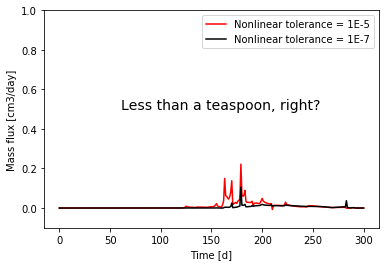

In [49]:
#Alex
path1 = '/Users/ajc/FUSE2/simulations/others/Alex/Debug/srun1/mass_flux_3m.dat'
srun1 = np.loadtxt(path1,usecols=1,skiprows=6)/55555. * 1e6*86400
path2 = '/Users/ajc/FUSE2/simulations/others/Alex/Debug/srun2/mass_flux_3m.dat'
srun2 = np.loadtxt(path2,usecols=1,skiprows=6)/55555.* 1e6*86400



plt.plot(srun1,'r',label='Nonlinear tolerance = 1E-5')
plt.plot(srun2,'k',label='Nonlinear tolerance = 1E-7')
plt.ylabel('Mass flux [cm3/day]')
plt.xlabel('Time [d]')
plt.text(60.4,0.5,'Less than a teaspoon, right?',fontsize=14)
plt.ylim(-1e-1,1e-0)
plt.legend()